In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import re
import os


import numpy as np  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

%matplotlib inline

In [2]:
house_data = pd.read_csv('house_data_clean_no_coordinates.csv')
house_data['sale_date'] = pd.to_datetime(house_data['sale_date'])

In [3]:
house_data.describe()

,Antal rum,Avgift/månad,Begärt pris,Boarea,Byggår,Driftskostnad,Pris per kvadratmeter,Prisutveckling,id,price,Biarea,Tomtarea,lat,lon
count,22434.000000,2.243400e+04,2.243400e+04,22434.000000,2.243400e+04,22434.000000,22434.000000,2.243400e+04,22434.000000,2.243400e+04,22434.000000,22434.00000,22434.000000,22434.000000
mean,4.977891,3.175655e+03,2.654204e+06,216.766604,8.741867e+10,18589.651467,29461.822279,2.051977e+05,528051.927209,2.881532e+06,21.224035,1065.54141,57.894742,12.183183
std,4.191378,1.642644e+05,6.213439e+05,268.321613,1.308051e+13,15257.182467,9696.504115,2.810909e+05,259348.711121,5.456841e+05,43.502880,6111.72088,0.304406,0.535244
min,3.000000,0.000000e+00,0.000000e+00,38.000000,0.000000e+00,0.000000,8803.000000,-5.225000e+06,313.000000,2.000050e+06,0.000000,0.00000,57.330030,10.991294
25%,3.000000,0.000000e+00,2.200000e+06,85.000000,1.954000e+03,4440.000000,22115.000000,0.000000e+00,307907.500000,2.415000e+06,0.000000,0.00000,57.695557,11.926365
50%,4.000000,0.000000e+00,2.595000e+06,115.000000,1.971000e+03,19437.000000,28313.000000,2.000000e+05,545008.500000,2.810000e+06,0.000000,191.00000,57.747187,12.012291
75%,5.000000,4.387000e+03,3.000000e+06,151.000000,1.992000e+03,31300.750000,35487.750000,3.800000e+05,757418.250000,3.325000e+06,30.000000,938.00000,57.991506,12.291706
max,75.000000,2.460250e+07,8.240000e+06,2685.000000,1.959196e+15,405696.000000,61000.000000,9.950000e+05,939070.000000,3.999500e+06,1535.000000,338321.00000,59.099301,14.612577


In [4]:
house_data.head()

,Antal rum,Avgift/månad,Begärt pris,Boarea,Byggår,Driftskostnad,Förening,Pris per kvadratmeter,Prisutveckling,address,...,id,map_url,price,sale_date,type,url,Biarea,Tomtarea,lat,lon
0,4.0,5604.0,2475000.0,103.0,2008.0,9600.0,Brf Höjdpunkten,24757.0,75000.0,Björkhagegatan 6,...,938778.0,https:maps.googleapis.commapsapijs?libraries=g...,2550000.0,2019-01-28,bostadsratt,saldabostadsratt-4-stadsskogen-alingsas-kommun...,0.0,0.0,57.922913,12.502651
1,7.0,0.0,1995000.0,175.0,1958.0,52400.0,0,13029.0,285000.0,Ekebackevägen 1,...,938744.0,https:maps.googleapis.commapsapijs?libraries=g...,2280000.0,2019-01-28,villa,saldavilla-7-lilla-foss-munkedals-kommun-ekeba...,145.0,1483.0,58.472414,11.669846
2,5.0,0.0,3495000.0,103.0,1979.0,38865.0,0,32330.0,-165000.0,Agnebäcksvägen 24,...,938717.0,https:maps.googleapis.commapsapijs?libraries=g...,3330000.0,2019-01-28,radhus,saldaradhus-5-landvetter-harryda-kommun-agneba...,0.0,201.0,57.690137,12.208904
3,5.0,0.0,2275000.0,137.0,1980.0,36000.0,0,16606.0,0.0,Tvåöringsgränd 12,...,938962.0,https:maps.googleapis.commapsapijs?libraries=g...,2275000.0,2019-01-28,villa,saldavilla-5-helenedal-uddevalla-kommun-tvaori...,21.0,346.0,58.377189,11.952472
4,3.0,4492.0,2650000.0,70.0,2016.0,0.0,BRF Lergöken,40000.0,150000.0,Lergöksgatan 15,...,938923.0,https:maps.googleapis.commapsapijs?libraries=g...,2800000.0,2019-01-28,bostadsratt,saldabostadsratt-3-frolunda-goteborgs-kommun-l...,0.0,0.0,57.657389,11.900349


In [5]:
house_data.dtypes

Antal rum                       float64
Avgift/månad                    float64
Begärt pris                     float64
Boarea                          float64
Byggår                          float64
Driftskostnad                   float64
Förening                         object
Pris per kvadratmeter           float64
Prisutveckling                  float64
address                          object
coordinate                       object
id                              float64
map_url                          object
price                           float64
sale_date                datetime64[ns]
type                             object
url                              object
Biarea                          float64
Tomtarea                        float64
lat                             float64
lon                             float64
dtype: object

In [6]:
house_data['type'].unique()

array(['bostadsratt', 'villa', 'radhus'], dtype=object)

In [7]:
mask = (((house_data['type'] == 'villa') | (house_data['type'] == 'radhus')) &
        (house_data['Boarea'] < 400) & 
        (house_data['Antal rum'] < 20) & 
        (house_data['Biarea'] < 400) & 
        (house_data['Driftskostnad'] < 50000) &
        (house_data['Tomtarea'] < 200000)
        
       )


In [8]:
house_data['Driftskostnad'].mean()

18589.651466524025

In [9]:
data = house_data.loc[mask].copy()
data['sale_date'] = data['sale_date'].astype(int) / (10**9)

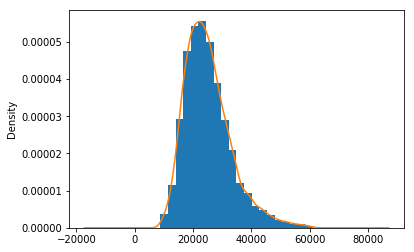

In [10]:
fig,ax = plt.subplots()
data['Pris per kvadratmeter'].hist(bins=20, density=True, ax=ax)
data['Pris per kvadratmeter'].plot.density(ax=ax)

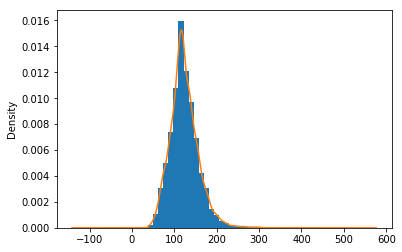

In [11]:
fig,ax = plt.subplots()
data['Boarea'].hist(bins=30, density=True, ax=ax)
data['Boarea'].plot.density(ax=ax)

In [98]:
y_feature = 'Pris per kvadratmeter'
y = data[y_feature]
feature_columns = ['Antal rum','Boarea','sale_date','Biarea','Tomtarea']
#feature_columns = ['Boarea','Antal rum']

X = data[feature_columns]

In [99]:
X.head()

,Antal rum,Boarea,sale_date,Biarea,Tomtarea
2,5.0,103.0,1.548634e+09,0.0,201.0
3,5.0,137.0,1.548634e+09,21.0,346.0
8,5.0,122.0,1.548634e+09,10.0,516.0
10,3.0,72.0,1.548547e+09,0.0,195.0
12,6.0,156.0,1.548547e+09,0.0,979.0


In [100]:
import seaborn as sns

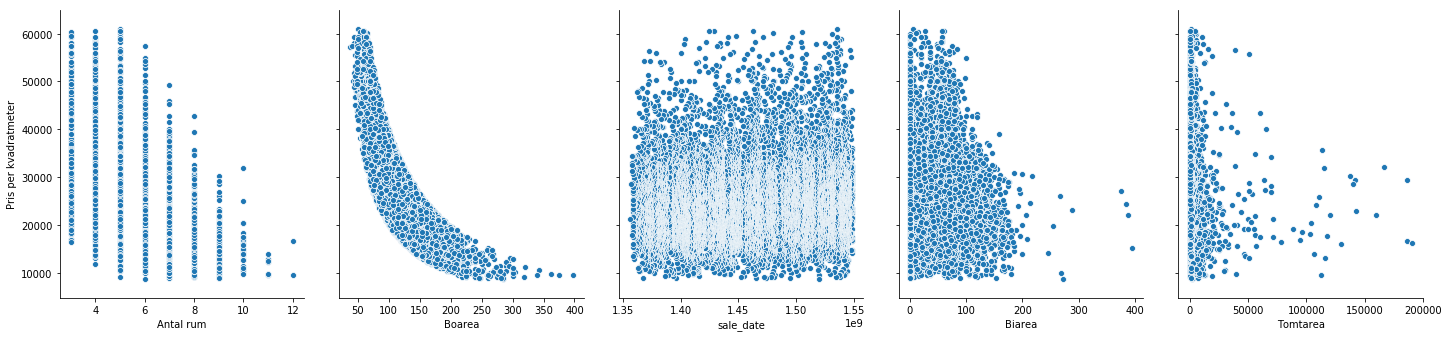

In [101]:
a = sns.pairplot(data = data, x_vars = feature_columns,y_vars = [y_feature])
a.fig.set_size_inches(20,5)

In [102]:
data[['Pris per kvadratmeter','price','Boarea']].head()

,Pris per kvadratmeter,price,Boarea
2,32330.0,3330000.0,103.0
3,16606.0,2275000.0,137.0
8,29508.0,3600000.0,122.0
10,36111.0,2600000.0,72.0
12,22756.0,3550000.0,156.0


In [103]:
X.isnull().any()

Antal rum    False
Boarea       False
sale_date    False
Biarea       False
Tomtarea     False
dtype: bool

In [104]:
y.isnull().any()

False

## Linear regression

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [134]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
#For retrieving the slope:
regressor.coef_

array([ 3.19285661e+02, -1.83348230e+02,  1.00980393e-05, -9.10994811e+00,
        3.58447018e-03])

In [136]:
y_pred = regressor.predict(X_test)

In [140]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', regressor))
pipeline_linear = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline_linear, X, y, cv=kfold)
results

array([0.55079596, 0.53265642, 0.55587418, 0.58670975, 0.58454526,
       0.50941875, 0.56065727, 0.51892888, 0.52743448, 0.54457055])

In [141]:
results.mean()

0.5471591492874508

In [142]:
pipeline_linear.fit(X,y)

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [143]:
y_pred = pipeline_linear.predict(X)

In [144]:
df = pd.DataFrame()
df['price_pred'] = y_pred
df['price'] = y

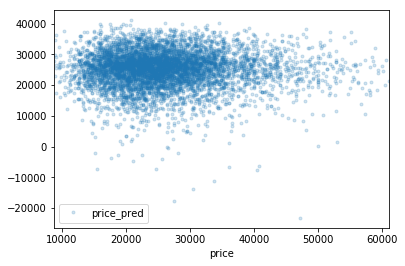

In [145]:
df.plot(x = 'price',y = 'price_pred',style = '.',alpha = 0.2)

## Keras

In [115]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


In [116]:
y2 = data['price']
feature_columns = ['Antal rum','Boarea','sale_date','Biarea','Tomtarea','lat','lon']
#feature_columns = ['Boarea','Antal rum']

X2 = data[feature_columns]

In [117]:
input_dim= len(X2.columns)

# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [118]:
#X2 = X.iloc[0:1000]
#y2 = y.iloc[0:1000]


In [119]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X2, y2, cv=kfold)

In [120]:
results

array([-8.30177674e+12, -8.01774314e+12, -7.88658059e+12, -8.15076437e+12,
       -7.75344892e+12, -7.76688876e+12, -7.68022580e+12, -7.16441389e+12,
       -7.30279003e+12, -7.20541139e+12])

In [121]:
np.mean(results)

-7723004362084.114

In [122]:
pipeline.fit(X2,y2)

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x154a25d30>)],
         verbose=False)

In [123]:
y_pred = pipeline.predict(X2)

In [124]:
df = pd.DataFrame()
df['price_pred'] = y_pred
df['price'] = y2

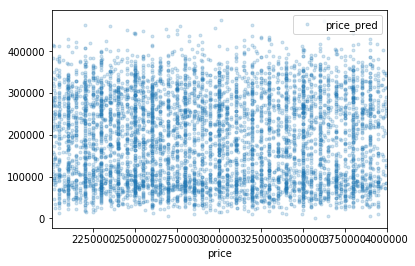

In [125]:
df.plot(x = 'price',y = 'price_pred',style = '.',alpha = 0.2)

In [126]:
feature_columns

['Antal rum', 'Boarea', 'sale_date', 'Biarea', 'Tomtarea', 'lat', 'lon']

In [127]:
antal_rum = 4
boarea = 56
driftskostnad = 44000
sale_date = 1.548634e+09
biarea = 37
tomtarea = 308
lat = 58.03
lon = 11.76

indata = [antal_rum, boarea,sale_date,biarea,tomtarea,lat,lon]

In [128]:
X2.head()

,Antal rum,Boarea,sale_date,Biarea,Tomtarea,lat,lon
2,5.0,103.0,1.548634e+09,0.0,201.0,57.690137,12.208904
3,5.0,137.0,1.548634e+09,21.0,346.0,58.377189,11.952472
8,5.0,122.0,1.548634e+09,10.0,516.0,58.363694,13.816873
10,3.0,72.0,1.548547e+09,0.0,195.0,57.916395,12.560278
12,6.0,156.0,1.548547e+09,0.0,979.0,58.087088,11.952235


In [129]:
result = pipeline.predict([indata])[0]

In [147]:
indata = [antal_rum, boarea,sale_date,biarea,tomtarea]

result = pipeline_linear.predict([indata])[0]

In [149]:
result*boarea

2136116.9842830137